In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
print("Imports Complete!")

Imports Complete!


In [23]:
df = pd.read_csv("UnemploymentInIndia.csv.xls")
print("Shape: ", df.shape)
print("\nColumns: ", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing Values: \n", df.isna().sum());

Shape:  (768, 7)

Columns:  ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']

First 5 rows:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                   

In [24]:
df[' Date'] = pd.to_datetime(df[' Date'], infer_datetime_format=True)

print("Dates: \n", df.head())

df = df.rename(columns={
    ' Estimated Unemployment Rate (%)' : 'Unemployment_Rate',
    ' Estimated Employed' : 'Employed',
    ' Estimated Labour Participation Rate (%)' : 'Labour_Participation_Rate',
    ' Date' : 'Date',
    ' Frequency' : 'Frequency'
})


Dates: 
            Region       Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31    Monthly                              3.65   
1  Andhra Pradesh 2019-06-30    Monthly                              3.05   
2  Andhra Pradesh 2019-07-31    Monthly                              3.75   
3  Andhra Pradesh 2019-08-31    Monthly                              3.32   
4  Andhra Pradesh 2019-09-30    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


/var/folders/cr/qcmwvlds3sj2mq_y233smrfr0000gn/T/ipykernel_18200/3925857094.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[' Date'] = pd.to_datetime(df[' Date'], infer_datetime_format=True)
/var/folders/cr/qcmwvlds3sj2mq_y233smrfr0000gn/T/ipykernel_18200/3925857094.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'], infer_datetime_format=True)


In [25]:
print("Columns: \n ", df.columns.tolist())
print(df.isna().sum())

Columns: 
  ['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed', 'Labour_Participation_Rate', 'Area']
Region                       28
Date                         28
Frequency                    28
Unemployment_Rate            28
Employed                     28
Labour_Participation_Rate    28
Area                         28
dtype: int64


In [26]:
# The database contains 28 missing values.

df = df.dropna(subset=['Unemployment_Rate'], axis=0, inplace=False)

In [27]:
# The original database had some missing values, this new database does not.

print(df.isna().sum())

Region                       0
Date                         0
Frequency                    0
Unemployment_Rate            0
Employed                     0
Labour_Participation_Rate    0
Area                         0
dtype: int64


In [28]:
# Data Cleaning

print(df.shape)
print(df.columns.tolist())
print(df.info)
print(df.isna().sum())
print(df.nunique())
print(df.columns.tolist())
print(df.describe)
assert df['Unemployment_Rate'].min() >= 0

(740, 7)
['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed', 'Labour_Participation_Rate', 'Area']
<bound method DataFrame.info of              Region       Date Frequency  Unemployment_Rate    Employed  \
0    Andhra Pradesh 2019-05-31   Monthly               3.65  11999139.0   
1    Andhra Pradesh 2019-06-30   Monthly               3.05  11755881.0   
2    Andhra Pradesh 2019-07-31   Monthly               3.75  12086707.0   
3    Andhra Pradesh 2019-08-31   Monthly               3.32  12285693.0   
4    Andhra Pradesh 2019-09-30   Monthly               5.17  12256762.0   
..              ...        ...       ...                ...         ...   
749     West Bengal 2020-02-29   Monthly               7.55  10871168.0   
750     West Bengal 2020-03-31   Monthly               6.67  10806105.0   
751     West Bengal 2020-04-30   Monthly              15.63   9299466.0   
752     West Bengal 2020-05-31   Monthly              15.22   9240903.0   
753     West Bengal 2020-06-30  

<Axes: xlabel='Date', ylabel='Unemployment_Rate'>

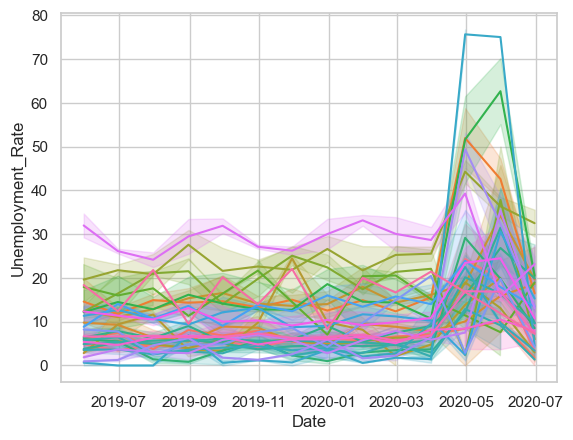

In [ ]:
# Visualization

# Overall trend over time

sns.lineplot(data=df, x='Date' ,y='Unemployment_Rate', hue='Region', legend=False)

# A line plot is ambigous for this data, trying another plot to represent the data better

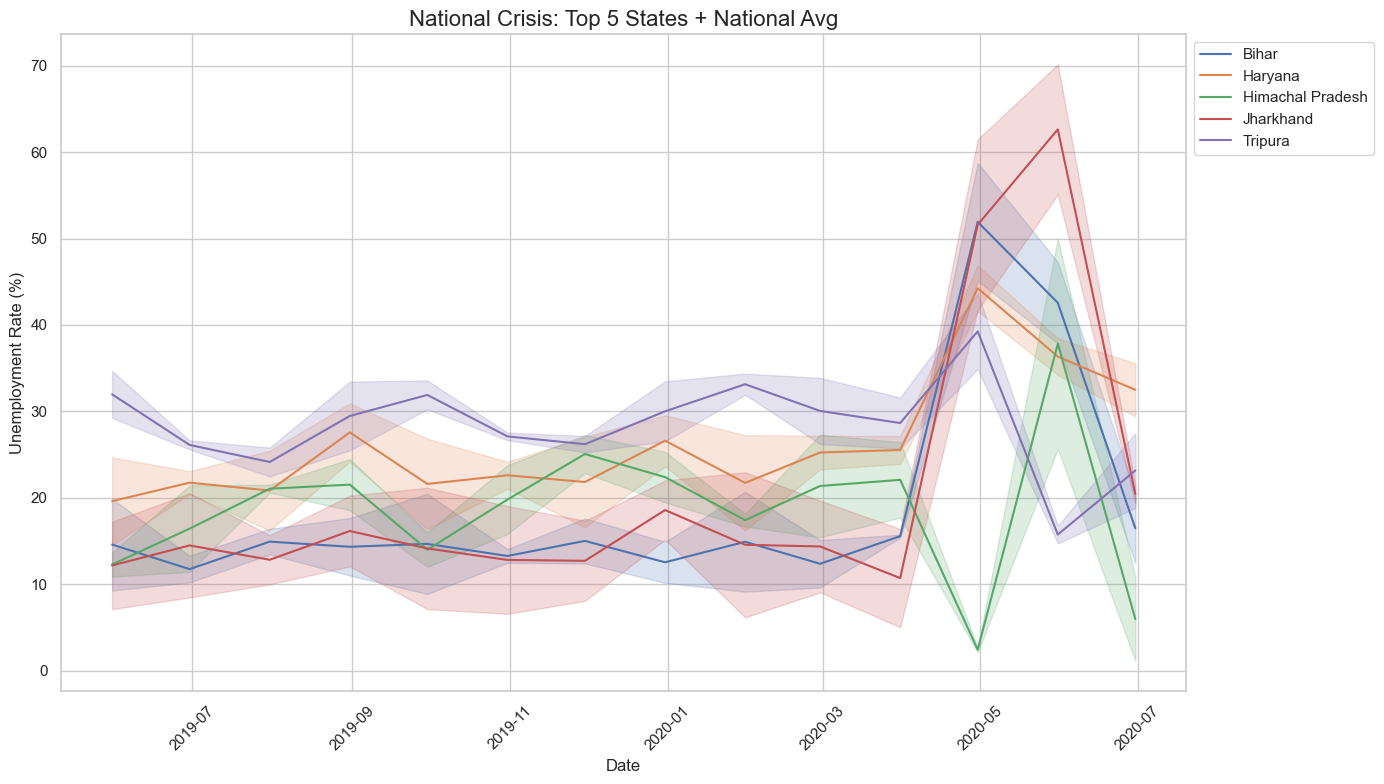

In [56]:
# Top 5 highest average states
top_states = df.groupby('Region')['Unemployment_Rate'].mean().nlargest(5).index
top_df = df[df['Region'].isin(top_states)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=top_df, x='Date', y='Unemployment_Rate', hue='Region')
plt.title('National Crisis: Top 5 States + National Avg', fontsize=16)
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



In [ ]:
# Unemployment rates have been affected by COVID-19. Jharkhand faces the most unemoployment among the top 5.

# Both rural and urban area have faced a rise in Unemployment rates after COVID-19. Before the pandemic Umemployment rates were flat at 10%

# National Lockdown = 01-03-2020

df['Date'] = pd.to_datetime(df['Date'])

covid_date = pd.to_datetime('2020-03-01')
pre_covid = df[df['Date'] < covid_date].copy()
post_covid = df[df['Date'] >= covid_date].copy()

print(f"Pre-Covid: {len(pre_covid)} rows (Jul 2019 - Feb 2020)")
print(f"Pre-Covid: {len(post_covid)} rows (Mar 2020 - Jun 2020)")



Pre-Covid: 536 rows (Jul 2019 - Feb 2020)
Pre-Covid: 204 rows (Mar 2020 - Jun 2020)


In [44]:
pre_stats = pre_covid.groupby('Region')['Unemployment_Rate'].agg(['mean', 'std']).round(2)
post_stats = post_covid.groupby('Region')['Unemployment_Rate'].agg(['mean', 'std']).round(2)

comparison = pd.DataFrame({
    'Pre_Covid_Mean': pre_stats['mean'],
    'Pre_Covid_Std': pre_stats['std'],
    'Post_Covid_Mean': post_stats['mean'],
    'Post_Covid_Std': post_stats['std'],
    'Change_%': ((post_stats['mean'] / pre_stats['mean'] - 1) * 100).round(1)
})

comparison


,Pre_Covid_Mean,Pre_Covid_Std,Post_Covid_Mean,Post_Covid_Std,Change_%
Region,,,,,
Andhra Pradesh,5.04,1.42,13.58,10.78,169.4
Assam,6.37,2.60,6.58,4.16,3.3
Bihar,13.83,3.91,31.63,17.77,128.7
Chandigarh,16.32,5.01,14.32,10.05,-12.3
Chhattisgarh,7.71,2.45,13.08,9.51,69.6
Delhi,14.23,3.25,22.16,9.89,55.7
Goa,8.51,7.04,13.11,6.50,54.1
Gujarat,5.18,1.16,10.38,7.66,100.4
Haryana,22.94,4.83,34.65,7.68,51.0


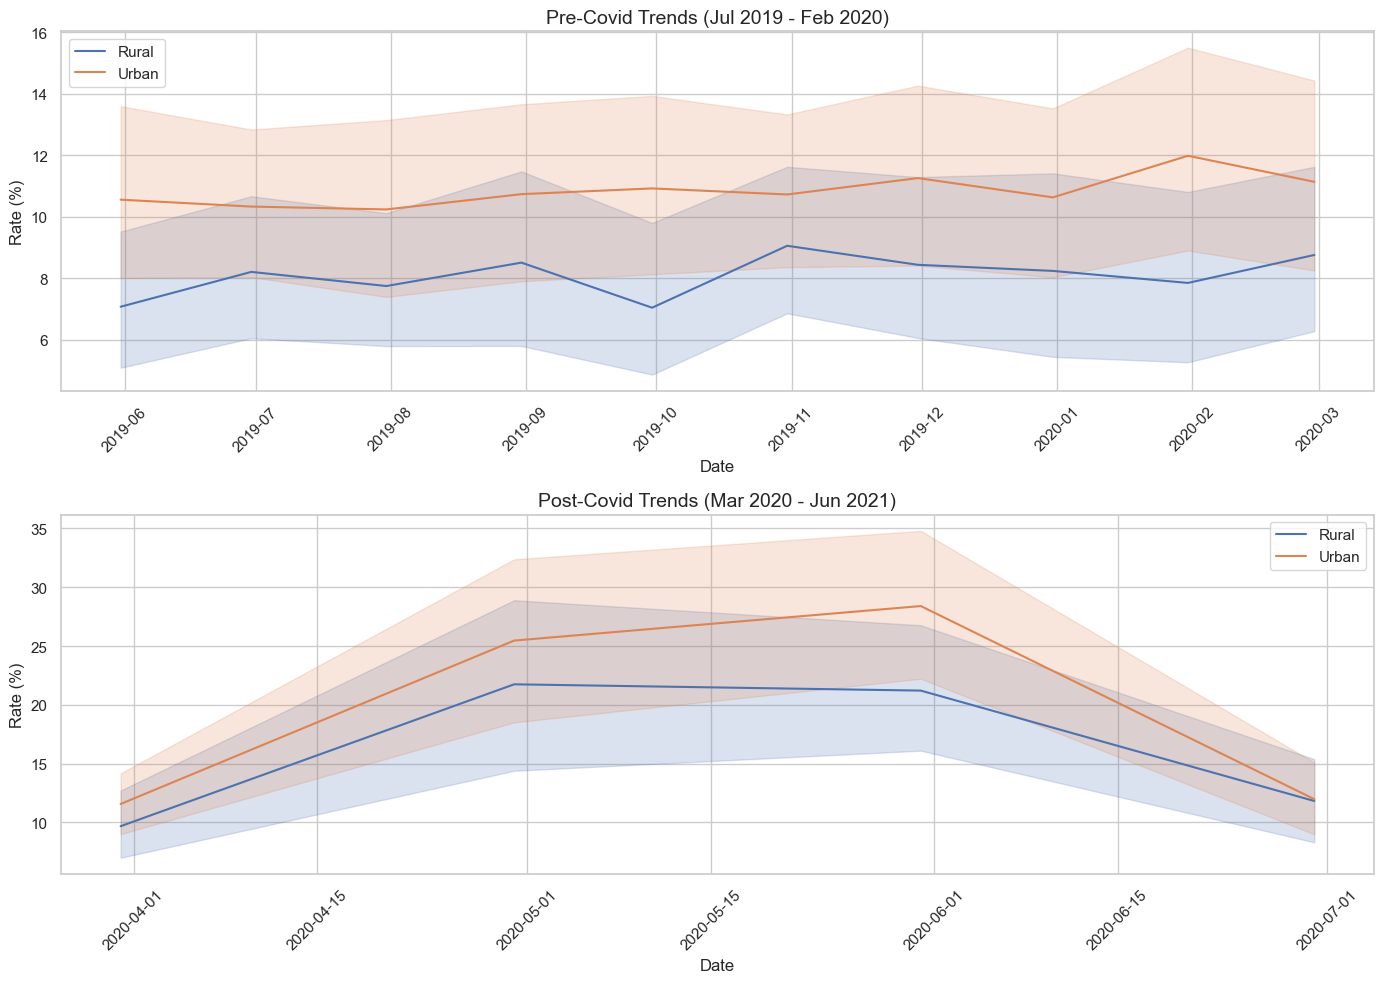

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.lineplot(data=pre_covid, x='Date', y='Unemployment_Rate', hue='Area')
plt.title('Pre-Covid Trends (Jul 2019 - Feb 2020)', fontsize=14)
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(2, 1, 2)
sns.lineplot(data=post_covid, x='Date', y='Unemployment_Rate', hue='Area')
plt.title('Post-Covid Trends (Mar 2020 - Jun 2021)', fontsize=14)
plt.ylabel('Rate (%)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout() 
plt.show()
